# Data understanding and Exploratory analysis (EDA)
## Topic: Examining the ecological processes influencing the assembly of molecules into OM assemblages


Dataset: 10 May 2022
Water with site and CFs 

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

In [2]:
# Load dataset
fn_water = "../Dataset/Water_Prevalence_10__commat_2021-09-29.csv"
df_water = pd.read_csv(fn_water)
print('Water: ' + str(df_water.shape))

# Data quality check
print(df_water.columns.nunique())

# Join datasets
df = df_water.copy()

# Check if there is any identical columns / CF across all samples
print("Duplicated column: " + str(df.columns.duplicated().any()))

# Pre-processing
df = df.rename(columns={"Unnamed: 0": "sample_id"})
df = df.set_index("sample_id").fillna(0).reset_index()

# For analysis
sw = df_water.rename(columns={"Unnamed: 0": "sample_id"}).set_index("sample_id")
print("Shape:" + str(sw.shape))

sw = sw.T
print(sw.shape)
sw.head()

Water: (265, 4936)
4936
Duplicated column: False
Shape:(265, 4935)
(4935, 265)


sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0097_U_2,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3
C10H10O5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
C10H10O5N2,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
C10H10O5S,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
C10H10O6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
C10H10O6N2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


## DOM clustering based on site

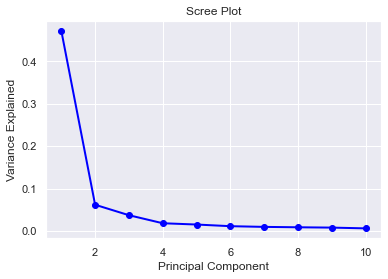

In [3]:
# Dimensionality reduction
from sklearn.decomposition import PCA
n = 10

#define PCA model to use
pca = PCA(n_components=n)

#fit PCA model to data
pca_fit = pca.fit(sw)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

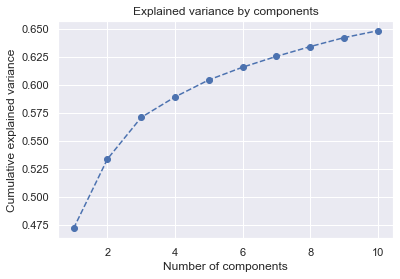

In [4]:
plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Distortion ; Inertias ; Silhouette


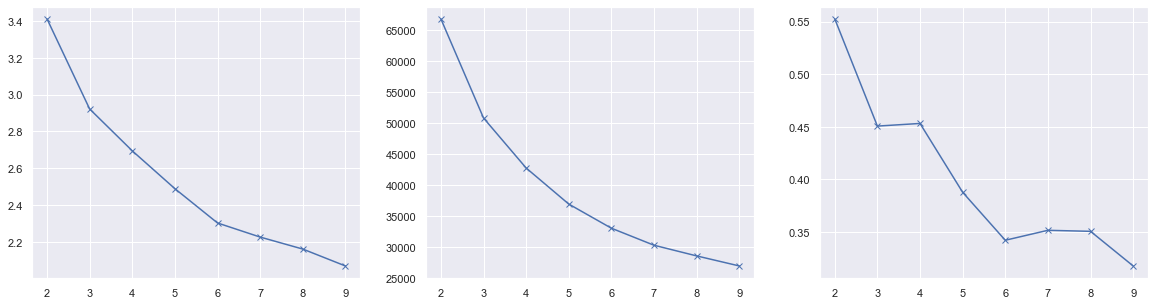

In [5]:
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Select n PCs based on scree plot
npc = 6

# PCA
pca = PCA(n_components=npc)
pca_fit = pca.fit(sw)
X = pca.transform(sw)

distortions = []
inertias = []
sil = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    sil.append(silhouette_score(X, kmeanModel.labels_, metric = 'euclidean'))
    
f, axs = plt.subplots(1,3, figsize=(20,5))
print("Distortion ; Inertias ; Silhouette")
axs[0].plot(K, distortions, 'bx-')
axs[1].plot(K, inertias, 'bx-')
axs[2].plot(K, sil, 'bx-')

# Hierachical Clustering on PCs

Text(0.5, 1.0, 'Dendrograms')

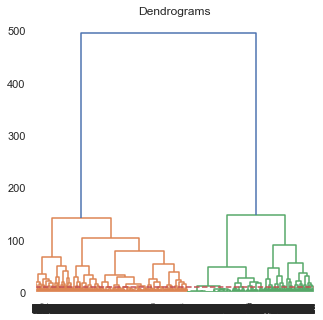

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(5, 5))
dendogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.title("Dendrograms")  

# Unsupervised k-Means Clustering

In [7]:
# Based on the plots decide k = 6
k = 6

In [8]:
kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
kmeanModel.fit(X)
distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
inertias.append(kmeanModel.inertia_)

from sklearn import metrics
metrics.silhouette_score(X, kmeanModel.labels_, metric='euclidean')

0.342146248766389

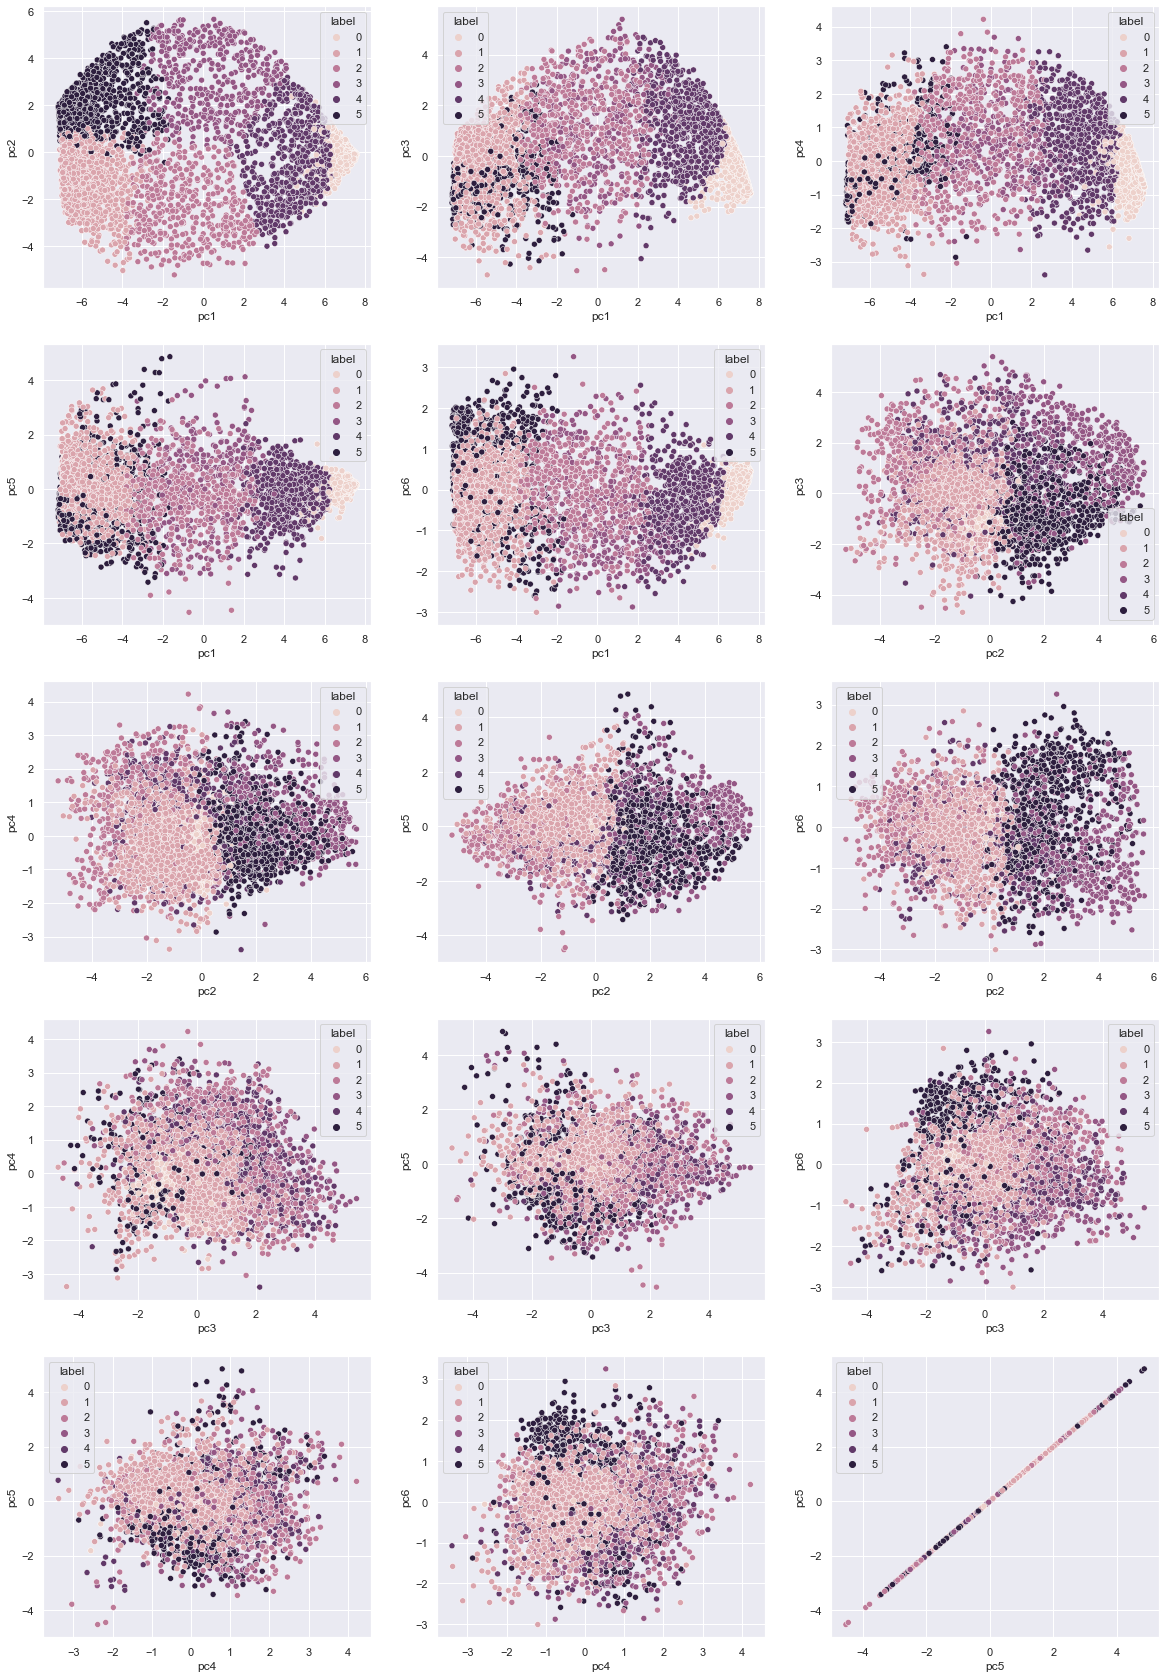

In [9]:
# Visualise 6 npcs
sw_pca_kmeans = pd.concat([sw.reset_index(), pd.DataFrame(X)], axis=1)
sw_pca_kmeans.columns.values[-npc:] = ['pc1','pc2', 'pc3', 'pc4', 'pc5', 'pc6'] 
sw_pca_kmeans['label'] = kmeanModel.labels_

# Plots
f, axs = plt.subplots(5, 3, figsize=(20,30))
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc2'], hue = sw_pca_kmeans['label'], ax=axs[0,0])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc3'], hue = sw_pca_kmeans['label'], ax=axs[0,1])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc4'], hue = sw_pca_kmeans['label'], ax=axs[0,2])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[1,0])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[1,1])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc3'], hue = sw_pca_kmeans['label'], ax=axs[1,2])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc4'], hue = sw_pca_kmeans['label'], ax=axs[2,0])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[2,1])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[2,2])
sns.scatterplot(sw_pca_kmeans['pc3'], sw_pca_kmeans['pc4'], hue = sw_pca_kmeans['label'], ax=axs[3,0])
sns.scatterplot(sw_pca_kmeans['pc3'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[3,1])
sns.scatterplot(sw_pca_kmeans['pc3'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[3,2])
sns.scatterplot(sw_pca_kmeans['pc4'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[4,0])
sns.scatterplot(sw_pca_kmeans['pc4'], sw_pca_kmeans['pc6'], hue = sw_pca_kmeans['label'], ax=axs[4,1])
sns.scatterplot(sw_pca_kmeans['pc5'], sw_pca_kmeans['pc5'], hue = sw_pca_kmeans['label'], ax=axs[4,2])
plt.show()

In [10]:
# Presence of CF per cluster
results = sw.copy()
results['DOM_cluster'] = kmeanModel.labels_
results['DOM_cluster'].value_counts()

1    1316
0    1202
5     755
4     706
2     484
3     472
Name: DOM_cluster, dtype: int64

In [11]:
mapping = results['DOM_cluster'].reset_index()
mapping

,index,DOM_cluster
0,C10H10O5,0
1,C10H10O5N2,5
2,C10H10O5S,5
3,C10H10O6,0
4,C10H10O6N2,5
...,...,...
4930,C9H8O6S,5
4931,C9H8O7,3
4932,C9H8O8,1
4933,C9H9O5N,3


In [12]:
## For each site what is the prominent cluster, i.e. for each site how many % of 6 DOMs
results.head()

sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3,DOM_cluster
C10H10O5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
C10H10O5N2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,5
C10H10O5S,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,5
C10H10O6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
C10H10O6N2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,5


In [18]:
temp = results.groupby(['DOM_cluster']).sum()
temp.T

DOM_cluster,0,1,2,3,4,5
sample_id,,,,,,
SW_S19S.0003_U_1,1155,189,130,255,540,66
SW_S19S.0003_U_2,1200,184,255,209,644,68
SW_S19S.0003_U_3,1200,278,321,262,671,50
SW_S19S.0004_U_1,1200,261,291,309,657,105
SW_S19S.0004_U_2,1202,292,297,313,680,85
...,...,...,...,...,...,...
SW_S19S.0099_U_1,1189,97,57,390,482,461
SW_S19S.0099_U_2,1199,172,175,445,609,617
SW_S19S.0099_U_3,1165,78,49,350,399,382


How to link DOM cluster to metadata via site?

In [19]:
results['DOM_cluster'].value_counts()

1    1316
0    1202
5     755
4     706
2     484
3     472
Name: DOM_cluster, dtype: int64

## Merged site ID with DOM cluster